In [8]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from functions import *
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
### Auxiliar variables ###
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

names= ["Nearest Neighbors","Decision Tree","Linear SVM","Random Forest","Neural Net","AdaBoost"]

classifiers = [KNeighborsClassifier(3),DecisionTreeClassifier(max_depth=5),SVC(kernel="linear", C=0.025, probability=True), DecisionTreeClassifier(max_depth=5),RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),MLPClassifier(alpha=1, max_iter=1000),
            AdaBoostClassifier()]
target_names=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16"]

## Complete training of data

0.966105094528107


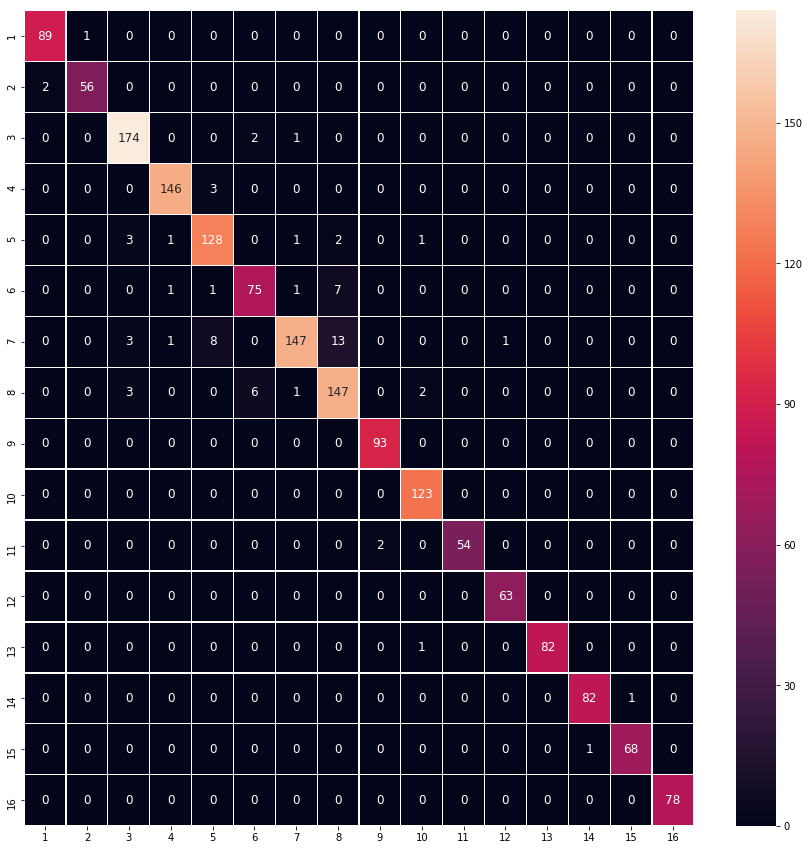

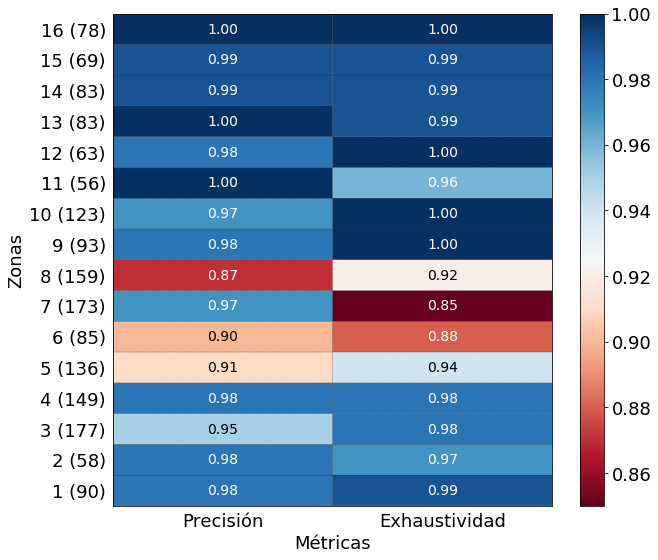

In [10]:
## Get the data

X,y = get_data('datos2.csv')

## Split the data

X_train, X_test, X_val, y_train, y_test, y_val = split_train_test_val(X,y)

## Train the algorithms

algorithms, youden = train_algorithms(X_train, y_train, X_test, y_test, names, classifiers)

## Classify them

y_final = classify(algorithms, youden, X_val)


## Save the figures

save_cm(y_val, y_final, "all_data", target_names)
print(report_classify(y_val, y_final, "all_data", target_names))

0.966105094528107


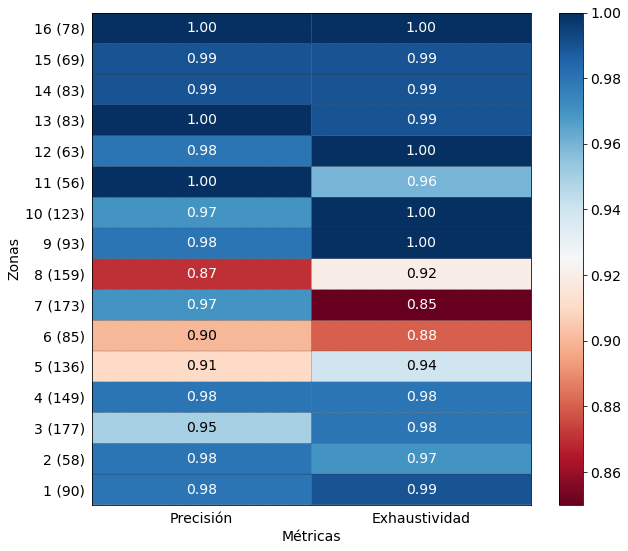

In [11]:
print(report_classify(y_val, y_final, "all_data", target_names))

## Analysis of number of data is needed for better accuracy

In [10]:
data = pd.read_csv('datos2.csv')
data = data.fillna(0)

sb = master_bar(numpy.linspace(0.3,1,40))

accuracy_ws = []

for partition in sb:
    subsample = data.sample(frac=partition, random_state=99)
    y_subsample = pd.factorize(subsample.iloc[:, 0])[0]
    X_subsample = subsample.iloc[:, 1:].values
    acc = []
    for times in progress_bar(range(10), parent=sb):
        ## Get the data
        X_train, X_test, X_val, y_train, y_test, y_val = split_train_test_val(X_subsample,y_subsample)
        ## Train the algorithms
        algorithms, youden = train_algorithms(X_train, y_train, X_test, y_test, names, classifiers)
        ## Classify them
        y_final = classify(algorithms, youden, X_val)
        acc.append(precision_score(y_val, y_final, average='macro'))
    acc_mean = numpy.mean(acc)
    accuracy_ws.append(acc_mean)

In [12]:
accuracy_ws

[0.893516429202599,
 0.9031528584934346,
 0.9254311900537051,
 0.9261305352582895,
 0.9213237362975295,
 0.9143057320520288,
 0.9381632469368786,
 0.904332659991898,
 0.9195293836827917,
 0.9404304343115187,
 0.9200208546332336,
 0.9372112699267052,
 0.9285205855873733,
 0.9285257277445214,
 0.9379966154631342,
 0.9424529125260012,
 0.9552291259821806,
 0.9373028856502593,
 0.9482489314525335,
 0.9468969622768718,
 0.9422315039476332,
 0.9425907343731069,
 0.9527393208521774,
 0.9498482082669882,
 0.9508335081191737,
 0.9502694045002162,
 0.9554051429244694,
 0.952379025556074,
 0.9476594632842748,
 0.9511543195606199,
 0.9455092460118628,
 0.9594991096648101,
 0.9481203180207258,
 0.9518870001690687,
 0.9505208028098867,
 0.9528052323757572,
 0.9548658803682235,
 0.9512229069738154,
 0.9565833369202632,
 0.9539538856921803]

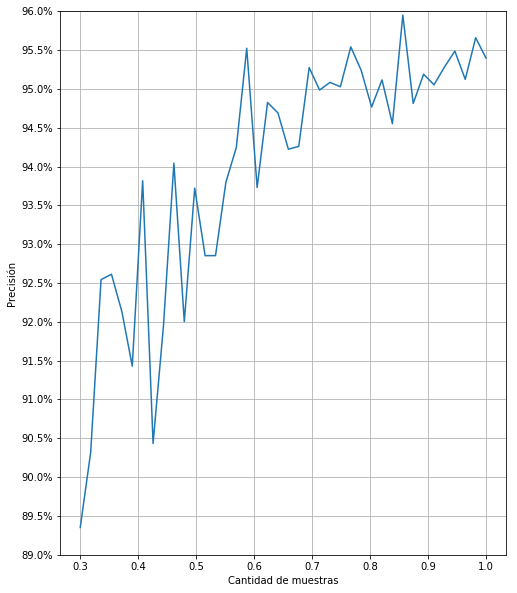

In [18]:
## Print the precision in a plot
n_prec = numpy.multiply(accuracy_ws,100)
#print(n_prec)
plt.figure(figsize=(8, 10))    
plt.plot(numpy.linspace(0.3,1,40),n_prec)
plt.xlabel('Cantidad de muestras')
plt.ylabel('Precisión')
plt.grid()
plt.yticks(numpy.arange(0, 101, step=0.5), ["{0:0.1f}".format(x) + "%" for x in numpy.arange(0, 101, step=0.5)], fontsize=10) 
plt.ylim(bottom=89,top=96)
plt.rcParams.update({'font.size': 10})
plt.savefig(f'prec_mues.svg', format="svg")

## Anonimyze the data

In [ ]:
import shortuuid

column = list(data.columns.values)

new_col = []
new_col.append('location')
for i in range(1,len(column)):
     new_col.append(shortuuid.uuid())
new_col
data.columns = new_col

data

data.to_csv('anonym.csv')

## Reducing the quantity of the aps in different ways

In [6]:
macs_2_ghz = [
'f8:4f:57:ab:d8:60',
'1c:1d:86:b6:ac:80',
'dc:a5:f4:43:72:e0',
'dc:a5:f4:43:72:90',
'5c:a4:8a:4c:05:c0',
'c0:7b:bc:36:af:40',
'c0:7b:bc:36:9e:10',
'1c:1d:86:9f:99:20',
'1c:1d:86:ce:ef:b0',
'dc:a5:f4:43:85:c0',
'dc:a5:f4:43:79:20',
'c0:7b:bc:36:af:80',
'f8:4f:57:ab:ce:20',
'dc:a5:f4:43:27:e0',
'f8:4f:57:ab:da:00'
]

macs_5_ghz = [
'f8:4f:57:ad:d7:c0',
'f8:4f:57:ad:d9:60',
'dc:a5:f4:45:79:10',
'1c:1d:86:a1:99:00',
'c0:7b:bc:38:af:30',
'c0:7b:bc:38:9e:00',
'1c:1d:86:b8:ac:80',
'5c:a4:8a:4e:05:30',
'1c:1d:86:d0:ef:00',
'dc:a5:f4:45:27:e0',
'f8:4f:57:ad:cd:80',
'dc:a5:f4:45:72:80',
'dc:a5:f4:45:85:b0',
'dc:a5:f4:45:72:d0',
'c0:7b:bc:38:af:70'
]

allowed_macs = ['f8:4f:57:ab:d8:60' , '1c:1d:86:b6:ac:80' , 'dc:a5:f4:43:72:e0' , 'dc:a5:f4:43:72:90' , '5c:a4:8a:4c:05:c0' , 'c0:7b:bc:36:af:40' , 'c0:7b:bc:36:9e:10' , '1c:1d:86:9f:99:20' , '1c:1d:86:ce:ef:b0' , 'dc:a5:f4:43:85:c0' , 'dc:a5:f4:43:79:20' , 'c0:7b:bc:36:af:80' , 'f8:4f:57:ab:ce:20' , 'dc:a5:f4:43:27:e0' , 'f8:4f:57:ab:da:00' , 'f8:4f:57:ad:d7:c0' , 'f8:4f:57:ad:d9:60' , 'dc:a5:f4:45:79:10' , '1c:1d:86:a1:99:00' , 'c0:7b:bc:38:af:30' , 'c0:7b:bc:38:9e:00' , '1c:1d:86:b8:ac:80' , '5c:a4:8a:4e:05:30' , '1c:1d:86:d0:ef:00' , 'dc:a5:f4:45:27:e0' , 'f8:4f:57:ad:cd:80' , 'dc:a5:f4:45:72:80' , 'dc:a5:f4:45:85:b0' , 'dc:a5:f4:45:72:d0' , 'c0:7b:bc:38:af:70']


## Filtered data with only the APs that we installed

0.9503971836893115


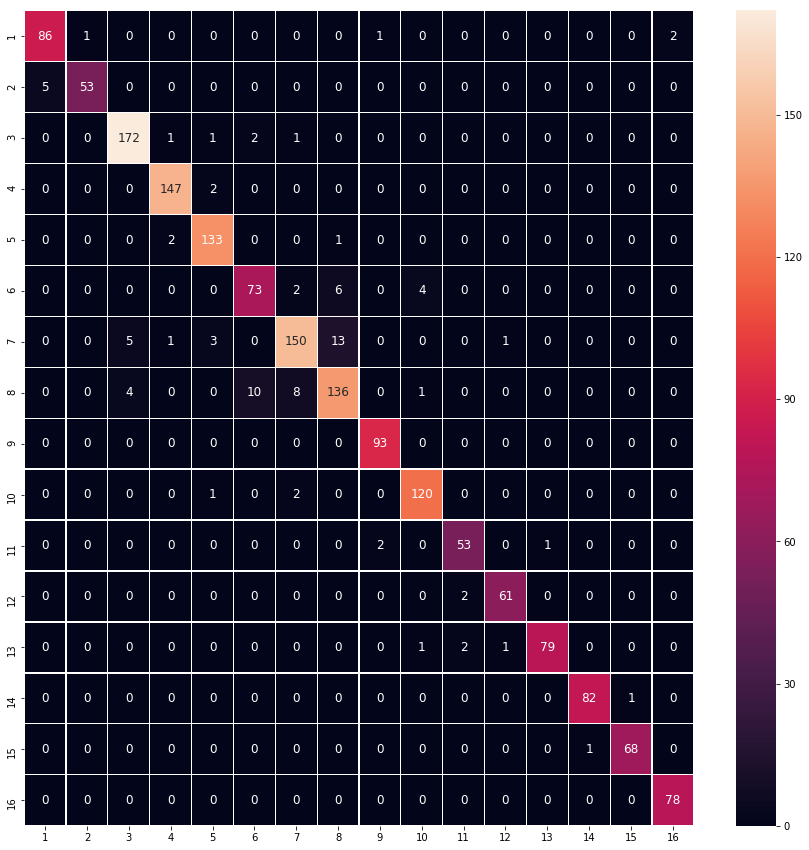

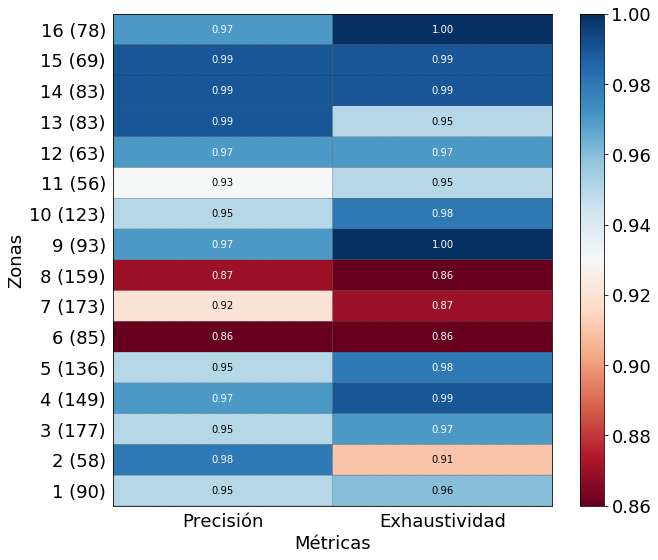

In [7]:
## Get the data

X_filtered,y_filtered = get_data('datos2.csv', filter_macs=True, allowed_macs=allowed_macs)

## Split the data

X_train, X_test, X_val, y_train, y_test, y_val = split_train_test_val(X_filtered,y_filtered)

## Train the algorithms

algorithms, youden = train_algorithms(X_train, y_train, X_test, y_test, names, classifiers)

## Classify them

y_final = classify(algorithms, youden, X_val)


## Save the figures

save_cm(y_val, y_final, "filtered_data", target_names)
print(report_classify(y_val, y_final, "filtered_data", target_names))

0.9508475684901536


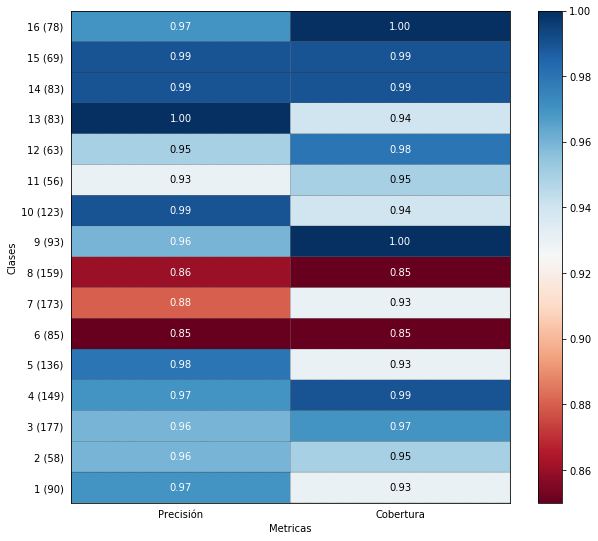

In [20]:
print(report_classify(y_val, y_final, "filtered_data", target_names))

## Train with 2ghz and classify with 2ghz

0.915314034195545


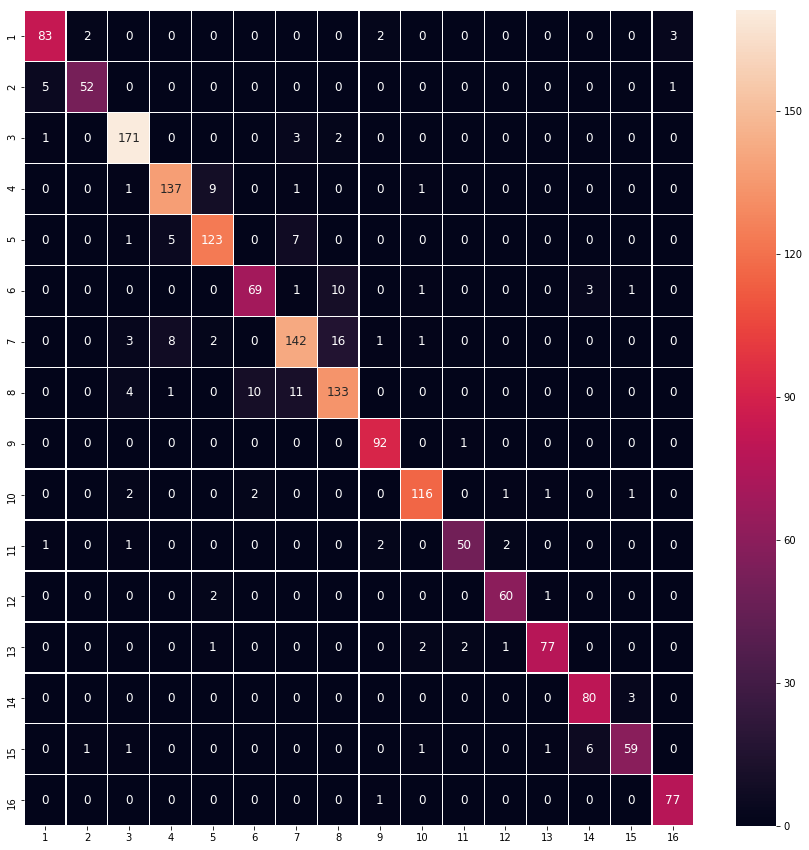

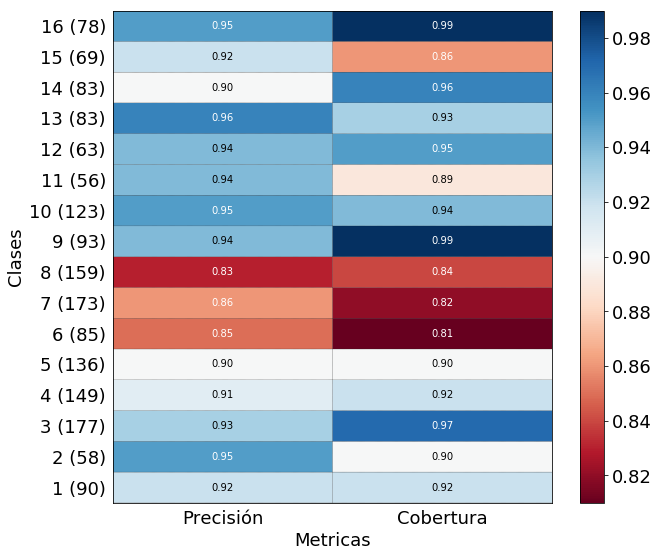

In [21]:
## Get the data

X_2ghz,y_2ghz = get_data('datos2.csv', filter_macs=True, allowed_macs=macs_2_ghz)

## Split the data

X_train, X_test, X_val, y_train, y_test, y_val = split_train_test_val(X_2ghz,y_2ghz)

## Train the algorithms

algorithms, youden = train_algorithms(X_train, y_train, X_test, y_test, names, classifiers)

## Classify them

y_final = classify(algorithms, youden, X_val)


## Save the figures

save_cm(y_val, y_final, "train_test_2ghz", target_names)
print(report_classify(y_val, y_final, "train_test_2ghz", target_names))

0.915314034195545


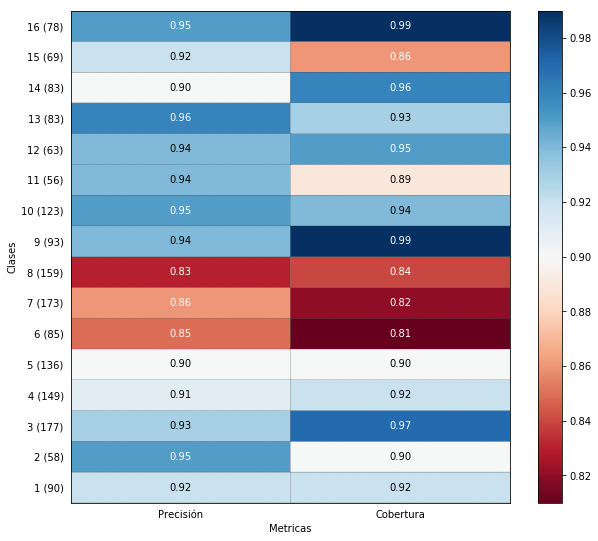

In [22]:
print(report_classify(y_val, y_final, "train_test_2ghz", target_names))

## Train with all and classify with 2ghz

/home/anavcevich/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anavcevich/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.24611396461369675


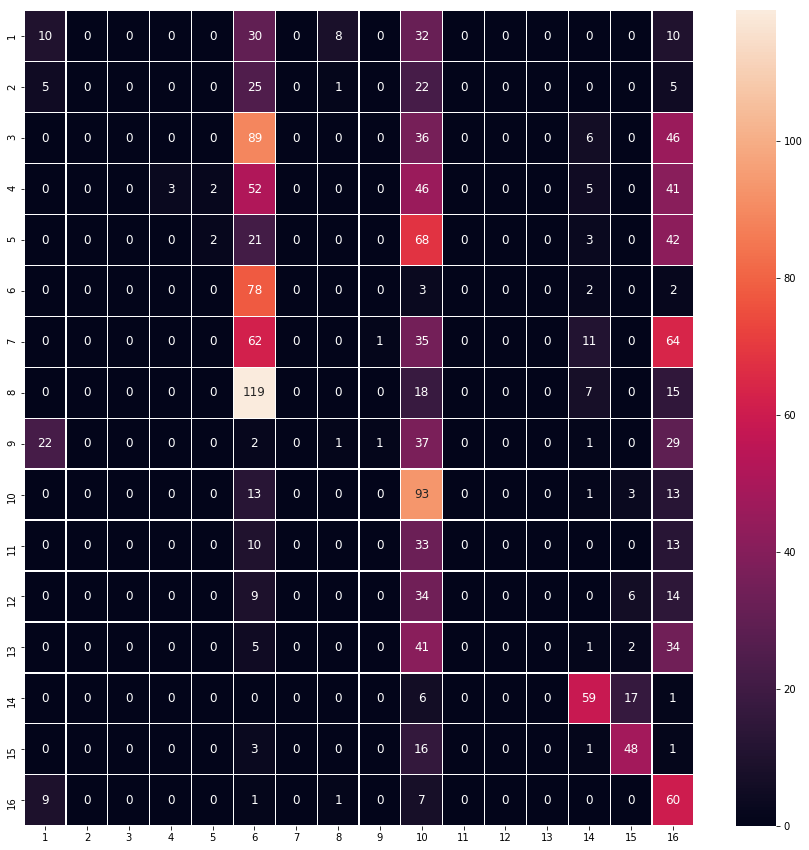

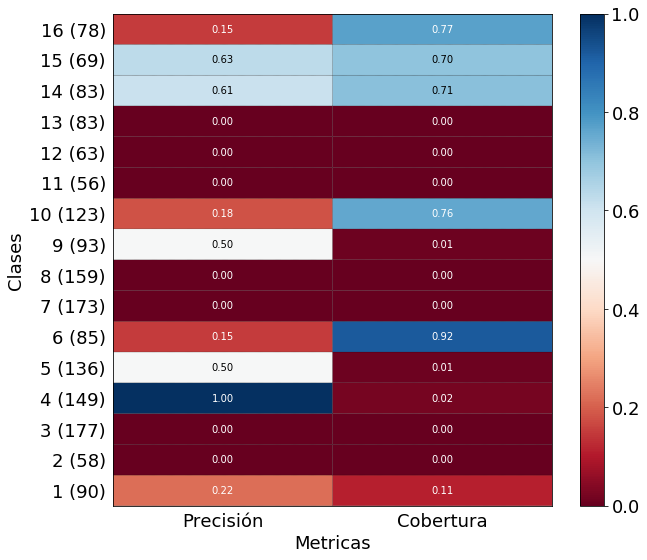

In [8]:
## Get the data

X,y = get_data('datos2.csv', filter_macs=True, allowed_macs=allowed_macs)

X_2ghz, y_2ghz = get_data('datos2.csv', filter_macs=True, allowed_macs=allowed_macs, to_zero=True, non_zero_macs=macs_2_ghz)

## Split the data

X_train, X_test, _, y_train, y_test, _ = split_train_test_val(X,y)


_, _, X_val, _, _, y_val = split_train_test_val(X_2ghz,y_2ghz)



## Train the algorithms

algorithms, youden = train_algorithms(X_train, y_train, X_test, y_test, names, classifiers)

## Classify them

y_final = classify(algorithms, youden, X_val)


## Save the figures

save_cm(y_val, y_final, "test_2ghz_data", target_names)
print(report_classify(y_val, y_final, "test_2ghz_data", target_names))

## Analysis of training with less aps than what we have.

In [3]:
ap_macs = [
    'f8:4f:57:ab:d8:60', #AP13
    'f8:4f:57:ad:d7:c0',
    'c0:7b:bc:36:af:80', #AP10
    'c0:7b:bc:38:af:70',
    'dc:a5:f4:45:72:80', #AP14
    'dc:a5:f4:43:72:90',
    'f8:4f:57:ab:da:00', #AP3
    'f8:4f:57:ad:d9:60',
    '1c:1d:86:9f:99:20', #AP8
    '1c:1d:86:a1:99:00',
    '1c:1d:86:b6:ac:80',
    'dc:a5:f4:43:72:e0',
    '5c:a4:8a:4c:05:c0',
    'c0:7b:bc:36:af:40',
    'c0:7b:bc:36:9e:10',
    '1c:1d:86:ce:ef:b0',
    'dc:a5:f4:43:85:c0',
    'dc:a5:f4:43:79:20',
    'f8:4f:57:ab:ce:20',
    'dc:a5:f4:43:27:e0',
    'dc:a5:f4:45:79:10',
    'c0:7b:bc:38:af:30',
    'c0:7b:bc:38:9e:00',
    '1c:1d:86:b8:ac:80',
    '5c:a4:8a:4e:05:30',
    '1c:1d:86:d0:ef:00',
    'dc:a5:f4:45:27:e0',
    'f8:4f:57:ad:cd:80',
    'dc:a5:f4:45:85:b0',
    'dc:a5:f4:45:72:d0'
]

prec = []


mb = master_bar(range(2,11,2))

for j in mb:
    acc = []
    for i in progress_bar(range(10),parent=mb):
        ## Get the data

        X,y = get_data('datos2.csv', filter_macs=True, allowed_macs=ap_macs[i:])

        ## Split the data

        X_train, X_test, X_val, y_train, y_test, y_val = split_train_test_val(X,y)

        ## Train the algorithms

        algorithms, youden = train_algorithms(X_train, y_train, X_test, y_test, names, classifiers)

        ## Classify them

        y_final = classify(algorithms, youden, X_val)

        acc.append(precision_score(y_val, y_final, average='macro'))
    prec.append(numpy.mean(acc))
    


[94.53101475 94.75080967 94.6671093  94.67705626 94.93269419]


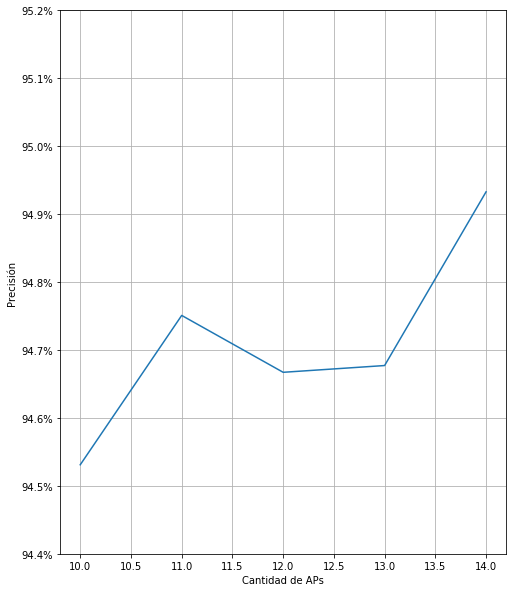

In [19]:
## Print the precision in a plot
n_prec = numpy.multiply(prec[::-1],100)
print(n_prec)
plt.figure(figsize=(8, 10))    
plt.plot(list(range(10,15)),n_prec)
plt.xlabel('Cantidad de APs')
plt.ylabel('Precisión')
plt.grid()
plt.yticks(numpy.arange(0, 101, step=0.1), ["{0:0.1f}".format(x) + "%" for x in numpy.arange(0, 101, step=0.1)], fontsize=10) 
plt.ylim(bottom=94.4,top=95.2)
plt.rcParams.update({'font.size': 10})
plt.savefig(f'prec_aps.svg', format="svg")


In [11]:
import functools 
import operator

ap_macs = [
   [ 'f8:4f:57:ab:d8:60',
    'f8:4f:57:ad:d7:c0'],
    ['c0:7b:bc:36:af:80',
    'c0:7b:bc:38:af:70'],
    ['dc:a5:f4:43:72:90',
    'dc:a5:f4:45:72:80'],
    ['f8:4f:57:ab:da:00',
    'f8:4f:57:ad:d9:60'],
   [ '1c:1d:86:9f:99:20',
    '1c:1d:86:a1:99:00'],
    ['dc:a5:f4:43:85:c0',
    'dc:a5:f4:45:85:b0'],
    ['dc:a5:f4:43:27:e0',
    'dc:a5:f4:45:27:e0'],
    ['5c:a4:8a:4c:05:c0',
    '5c:a4:8a:4e:05:30'],
    ['1c:1d:86:ce:ef:b0',
    '1c:1d:86:d0:ef:00'],
    ['dc:a5:f4:43:79:20',
    'dc:a5:f4:45:79:10'],
    ['c0:7b:bc:36:9e:10',
    'c0:7b:bc:38:9e:00'],
    ['c0:7b:bc:36:af:40',
    'c0:7b:bc:38:af:30'],
    ['1c:1d:86:b6:ac:80',
    '1c:1d:86:b8:ac:80'],
    ['dc:a5:f4:43:72:e0',
    'dc:a5:f4:45:72:d0'],
    ['f8:4f:57:ab:ce:20',
    'f8:4f:57:ad:cd:80']
]

used_macs = functools.reduce(operator.iconcat, ap_macs, [])


## Get the data

X,y = get_data('datos2.csv', filter_macs=True, allowed_macs=used_macs)

## Split the data

X_train, X_test, _, y_train, y_test, _ = split_train_test_val(X,y)

## Train the algorithms

algorithms, youden = train_algorithms(X_train, y_train, X_test, y_test, names, classifiers)




In [12]:
from itertools import combinations

prec = []

comb = combinations( ap_macs, 1)

combs = functools.reduce(operator.iconcat, list(comb), [])

for i in progress_bar(range(len(combs))):
    macs = [ x for x in ap_macs if combs[i] != x]
    macs = functools.reduce(operator.iconcat, macs, [])
   
    X_new,y_new = get_data('datos2.csv', filter_macs=True, allowed_macs=used_macs, to_zero=True, non_zero_macs=macs)

    ## Split the data

    _, _, X_val, _, _, y_val = split_train_test_val(X_new,y_new)

    ## Classify them

    y_final = classify(algorithms, youden, X_val)
    
    prec.append(precision_score(y_val, y_final, average='macro'))

/home/anavcevich/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
numpy.mean(prec)

0.8475859989202222

In [14]:
ap_macs = [
   [ 'f8:4f:57:ab:d8:60',
    'f8:4f:57:ad:d7:c0'],
    ['c0:7b:bc:36:af:80',
    'c0:7b:bc:38:af:70'],
    ['dc:a5:f4:43:72:90',
    'dc:a5:f4:45:72:80'],
    ['f8:4f:57:ab:da:00',
    'f8:4f:57:ad:d9:60'],
   [ '1c:1d:86:9f:99:20',
    '1c:1d:86:a1:99:00'],
    ['dc:a5:f4:43:85:c0',
    'dc:a5:f4:45:85:b0'],
    ['dc:a5:f4:43:27:e0',
    'dc:a5:f4:45:27:e0'],
    ['5c:a4:8a:4c:05:c0',
    '5c:a4:8a:4e:05:30'],
    ['1c:1d:86:ce:ef:b0',
    '1c:1d:86:d0:ef:00'],
    ['dc:a5:f4:43:79:20',
    'dc:a5:f4:45:79:10'],
    ['c0:7b:bc:36:9e:10',
    'c0:7b:bc:38:9e:00'],
    ['c0:7b:bc:36:af:40',
    'c0:7b:bc:38:af:30'],
    ['1c:1d:86:b6:ac:80',
    '1c:1d:86:b8:ac:80'],
    ['dc:a5:f4:43:72:e0',
    'dc:a5:f4:45:72:d0'],
    ['f8:4f:57:ab:ce:20',
    'f8:4f:57:ad:cd:80']
]

comb = combinations( ap_macs, 2)


combs = functools.reduce(operator.iconcat, comb, [])

prec = []

for i in progress_bar(range(0,len(combs), 2)):
    macs = [ x for x in ap_macs if combs[i] != x or combs[i+1] != x]
    macs = functools.reduce(operator.iconcat, macs, [])
    
    X_new,y_new = get_data('datos2.csv', filter_macs=True, allowed_macs=used_macs, to_zero=True, non_zero_macs=macs)

    ## Split the data

    _, _, X_val, _, _, y_val = split_train_test_val(X_new,y_new)

    ## Classify them

    y_final = classify(algorithms, youden, X_val)
    
    prec.append(precision_score(y_val, y_final, average='macro'))


In [15]:
numpy.mean(prec)

0.9576295590093603

In [16]:
ap_macs = [
   [ 'f8:4f:57:ab:d8:60',
    'f8:4f:57:ad:d7:c0'],
    ['c0:7b:bc:36:af:80',
    'c0:7b:bc:38:af:70'],
    ['dc:a5:f4:43:72:90',
    'dc:a5:f4:45:72:80'],
    ['f8:4f:57:ab:da:00',
    'f8:4f:57:ad:d9:60'],
   [ '1c:1d:86:9f:99:20',
    '1c:1d:86:a1:99:00'],
    ['dc:a5:f4:43:85:c0',
    'dc:a5:f4:45:85:b0'],
    ['dc:a5:f4:43:27:e0',
    'dc:a5:f4:45:27:e0'],
    ['5c:a4:8a:4c:05:c0',
    '5c:a4:8a:4e:05:30'],
    ['1c:1d:86:ce:ef:b0',
    '1c:1d:86:d0:ef:00'],
    ['dc:a5:f4:43:79:20',
    'dc:a5:f4:45:79:10'],
    ['c0:7b:bc:36:9e:10',
    'c0:7b:bc:38:9e:00'],
    ['c0:7b:bc:36:af:40',
    'c0:7b:bc:38:af:30'],
    ['1c:1d:86:b6:ac:80',
    '1c:1d:86:b8:ac:80'],
    ['dc:a5:f4:43:72:e0',
    'dc:a5:f4:45:72:d0'],
    ['f8:4f:57:ab:ce:20',
    'f8:4f:57:ad:cd:80']
]

comb = combinations( ap_macs, 3)


combs = functools.reduce(operator.iconcat, comb, [])

prec = []

for i in progress_bar(range(0,len(combs), 3)):
    macs = [ x for x in ap_macs if combs[i] != x or combs[i+1] != x or combs[i+2] != x]
    macs = functools.reduce(operator.iconcat, macs, [])
    
    X_new,y_new = get_data('datos2.csv', filter_macs=True, allowed_macs=used_macs, to_zero=True, non_zero_macs=macs)

    ## Split the data

    _, _, X_val, _, _, y_val = split_train_test_val(X_new,y_new)

    ## Classify them

    y_final = classify(algorithms, youden, X_val)
    
    prec.append(precision_score(y_val, y_final, average='macro'))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/anavcevich/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-dc2efcb15cf1>", line 45, in <module>
    X_new,y_new = get_data('datos2.csv', filter_macs=True, allowed_macs=used_macs, to_zero=True, non_zero_macs=macs)
  File "/home/anavcevich/Desktop/Fing/data_analysis/functions.py", line 75, in get_data
    index_to_use = new_indexes[j]
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/anavcevich/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2018, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/anavcevi

KeyboardInterrupt: 

In [ ]:
numpy.mean(prec)

## Granularity analysis

In [ ]:
data = pd.read_csv('datos_granu.csv')
data = data.fillna(0)


In [ ]:
y = pd.factorize(data.iloc[:, 0])[0]
X = data.iloc[:, 1:].values

## Get the data
X_train, X_test, X_val, y_train, y_test, y_val = split_train_test_val(X,y)
## Train the algorithms
algorithms, youden = train_algorithms(X_train, y_train, X_test, y_test, names, classifiers)
## Classify them
y_final = classify(algorithms, youden, X_val)

precision_score(y_val, y_final, average='macro')

In [ ]:
target_names_max = list(set(data.iloc[:, 0]))

number_of_targets_max = len(set(data.iloc[:, 0]))

all_names = target_names_max

arrayed_names = [name.split('_') for name in all_names]

locations_coords = set([(int(name[1]), int(name[2])) for name in arrayed_names])

locations_x = set([loc[0] for loc in locations_coords])

lines_of_locations = {}

coord_mapping = {}

for line_number in locations_x:
    line = [coord[1] for coord in locations_coords if coord[0] == line_number]
    line.sort()
    
    for idx in range(1, len(line), 2):
        coord_mapping[f'location_{line_number}_{line[idx -1]}'] = f'location_{line_number}_{line[idx]}'

target_names_med = list(set(all_names) - set(coord_mapping.keys()))

acum = 0

reduced_mapping_med = {}

reduced_mapping_reversed_med = {}

for name in target_names_med:
    reduced_mapping_med[name] = acum
    reduced_mapping_reversed_med[acum] = name
    acum += 1
   

i=1
m_data = []

for index, row in data.iterrows():
    target_name = row['location']
    new_location_name = coord_mapping[target_name] if target_name in coord_mapping else target_name
    row['location'] = new_location_name
    m_data.append(row)
 
medium_data = pd.DataFrame(m_data)

In [ ]:
y_medium = pd.factorize(medium_data.iloc[:, 0])[0]
X_medium = medium_data.iloc[:, 1:].values

## Get the data
X_train, X_test, X_val, y_train, y_test, y_val = split_train_test_val(X_medium,y_medium)
## Train the algorithms
algorithms, youden = train_algorithms(X_train, y_train, X_test, y_test, names, classifiers)
## Classify them
y_final = classify(algorithms, youden, X_val)

precision_score(y_val, y_final, average='macro')

In [ ]:
target_names_max = list(set(medium_data.iloc[:, 0]))

number_of_targets_max = len(set(medium_data.iloc[:, 0]))

all_names = target_names_max

arrayed_names = [name.split('_') for name in all_names]

locations_coords = set([(int(name[1]), int(name[2])) for name in arrayed_names])

locations_x = set([loc[0] for loc in locations_coords])

lines_of_locations = {}

coord_mapping = {}

for line_number in locations_x:
    line = [coord[1] for coord in locations_coords if coord[0] == line_number]
    line.sort()
    
    for idx in range(1, len(line), 2):
        coord_mapping[f'location_{line_number}_{line[idx -1]}'] = f'location_{line_number}_{line[idx]}'

target_names_med = list(set(all_names) - set(coord_mapping.keys()))

acum = 0

reduced_mapping_med = {}

reduced_mapping_reversed_med = {}

for name in target_names_med:
    reduced_mapping_med[name] = acum
    reduced_mapping_reversed_med[acum] = name
    acum += 1
   

i=1
min_data = []

for index, row in medium_data.iterrows():
    target_name = row['location']
    new_location_name = coord_mapping[target_name] if target_name in coord_mapping else target_name
    row['location'] = new_location_name
    min_data.append(row)
 
minimum_data = pd.DataFrame(min_data)

In [ ]:
y_min = pd.factorize(medium_data.iloc[:, 0])[0]
X_min = medium_data.iloc[:, 1:].values

## Get the data
X_train, X_test, X_val, y_train, y_test, y_val = split_train_test_val(X_min,y_min)
## Train the algorithms
algorithms, youden = train_algorithms(X_train, y_train, X_test, y_test, names, classifiers)
## Classify them
y_final = classify(algorithms, youden, X_val)

precision_score(y_val, y_final, average='macro')